In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df_merged = pd.read_csv("df_merged.csv")
df_ed = pd.read_csv("edu_clean.csv")

In [201]:
df_ed

,Entidad federativa,Total,Primaria,Secundaria,Media superior,Superior,Year
0,Estados Unidos Mexicanos,28569473,14792528,5349659,2955783,2047895,2000
1,Estados Unidos Mexicanos,31085098,14548194,5979256,3658754,2446726,2005
2,Estados Unidos Mexicanos,32835292,14887845,6137546,4187528,2981313,2010
3,Estados Unidos Mexicanos,34531661,14250425,6835245,4985080,3648945,2015
4,Estados Unidos Mexicanos,33612855,13677465,6394720,4985005,4030616,2020
...,...,...,...,...,...,...,...
193,Zacatecas,418011,198656,81896,45401,27198,2005
194,Zacatecas,446097,204562,82536,53160,35570,2010
195,Zacatecas,479072,196740,95265,64459,46802,2015
196,Zacatecas,478383,197572,89335,62703,51034,2020


In [202]:
df_merged

,Estado,ingresos,pip
0,Aguascalientes,21272285,2.016486e+06
1,Baja California,62509658,5.294618e+06
2,Baja California Sur,13615677,1.356479e+06
3,Campeche,14945176,5.889050e+06
4,Coahuila de Zaragoza,49839987,5.700187e+06
5,Colima,13234981,9.888492e+05
6,Chiapas,74332224,2.764085e+06
7,Chihuahua,59952292,5.260455e+06
8,Ciudad de México,165581119,2.898900e+07
9,Durango,28217111,1.954741e+06


In [203]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columnas = ['ingresos', 'pip']

df_merged[columnas] = scaler.fit_transform(df_merged[columnas])

df_merged

,Estado,ingresos,pip
0,Aguascalientes,0.031445,0.038198
1,Baja California,0.192779,0.155092
2,Baja California Sur,0.001489,0.014663
3,Campeche,0.006691,0.176288
4,Coahuila de Zaragoza,0.143211,0.169554
5,Colima,0.000000,0.001554
6,Chiapas,0.239033,0.064857
7,Chihuahua,0.182774,0.153874
8,Ciudad de México,0.596028,1.000000
9,Durango,0.058615,0.035997


In [204]:
df_ed = df_ed[df_ed["Entidad federativa"] != "Estados Unidos Mexicanos"]
df_ed

,Entidad federativa,Total,Primaria,Secundaria,Media superior,Superior,Year
6,Aguascalientes,292823,152340,53519,29490,21015,2000
7,Aguascalientes,333656,156150,64767,37296,27936,2005
8,Aguascalientes,357789,160233,68368,44733,36729,2010
9,Aguascalientes,389337,157794,75127,57720,47602,2015
10,Aguascalientes,400455,160480,74675,56636,53687,2020
...,...,...,...,...,...,...,...
193,Zacatecas,418011,198656,81896,45401,27198,2005
194,Zacatecas,446097,204562,82536,53160,35570,2010
195,Zacatecas,479072,196740,95265,64459,46802,2015
196,Zacatecas,478383,197572,89335,62703,51034,2020


In [205]:
columnas = [ "Total","Primaria",	"Secundaria", "Media superior", "Superior"]

df_ed[columnas] = scaler.fit_transform(df_ed[columnas])

df_ed

/tmp/ipykernel_102572/704433111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed[columnas] = scaler.fit_transform(df_ed[columnas])


,Entidad federativa,Total,Primaria,Secundaria,Media superior,Superior,Year
6,Aguascalientes,0.038732,0.048297,0.033781,0.021338,0.023758,2000
7,Aguascalientes,0.048171,0.050310,0.046546,0.033480,0.036412,2005
8,Aguascalientes,0.053749,0.052468,0.050632,0.045048,0.052487,2010
9,Aguascalientes,0.061042,0.051179,0.058303,0.065249,0.072366,2015
10,Aguascalientes,0.063612,0.052599,0.057790,0.063562,0.083491,2020
...,...,...,...,...,...,...,...
193,Zacatecas,0.067670,0.072774,0.065985,0.046087,0.035062,2005
194,Zacatecas,0.074163,0.075895,0.066711,0.058156,0.050368,2010
195,Zacatecas,0.081785,0.071762,0.081156,0.075731,0.070903,2015
196,Zacatecas,0.081626,0.072201,0.074427,0.072999,0.078641,2020


In [206]:
df = df_ed

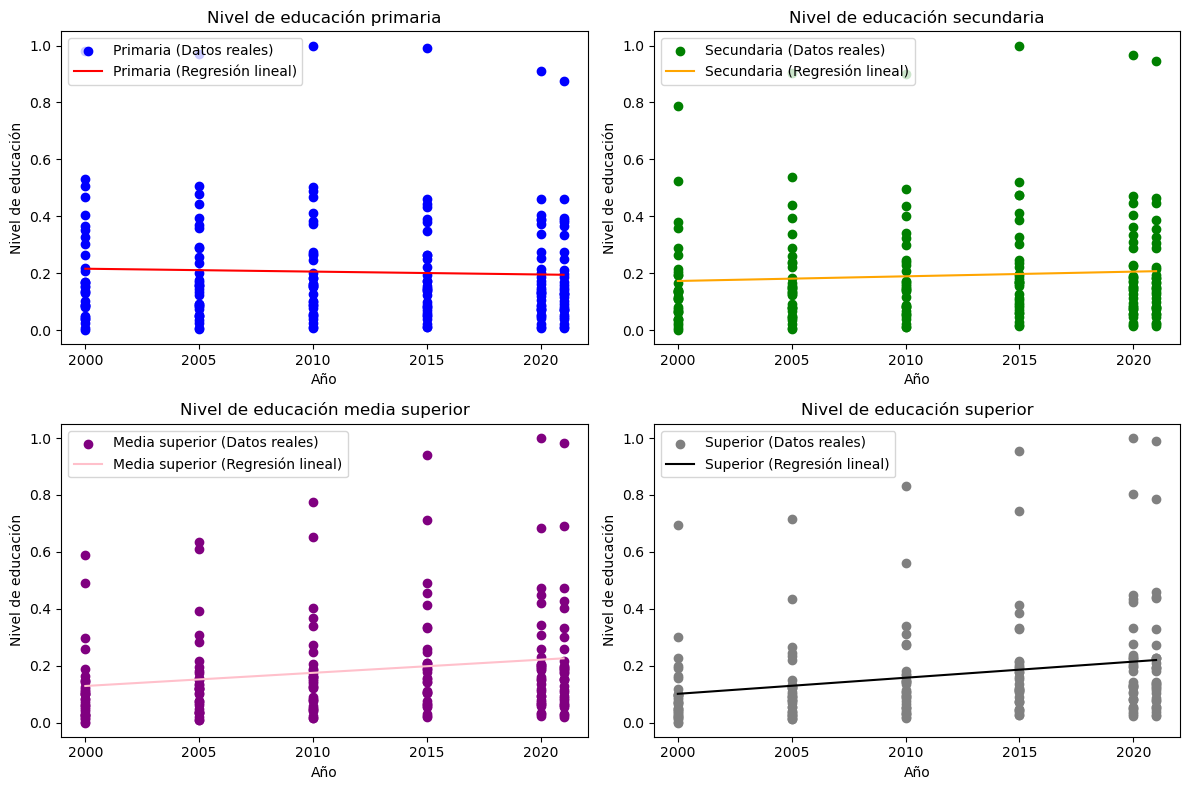

In [207]:
# Extraer las columnas relevantes para el modelo de regresión lineal
X = df[['Year']]
y_primaria = df['Primaria']
y_secundaria = df['Secundaria']
y_media_superior = df['Media superior']
y_superior = df['Superior']

# Crear el modelo de regresión lineal
regression = LinearRegression()

# Entrenar el modelo de regresión lineal para cada nivel de educación
regression.fit(X, y_primaria)
pred_primaria = regression.predict(X)

regression.fit(X, y_secundaria)
pred_secundaria = regression.predict(X)

regression.fit(X, y_media_superior)
pred_media_superior = regression.predict(X)

regression.fit(X, y_superior)
pred_superior = regression.predict(X)

# Generar gráficas
plt.figure(figsize=(12, 8))

# Gráfica para el nivel de educación primaria
plt.subplot(2, 2, 1)
plt.scatter(X, y_primaria, color='blue', label='Primaria (Datos reales)')
plt.plot(X, pred_primaria, color='red', label='Primaria (Regresión lineal)')
plt.xlabel('Año')
plt.ylabel('Nivel de educación')
plt.title('Nivel de educación primaria')
plt.legend()

# Gráfica para el nivel de educación secundaria
plt.subplot(2, 2, 2)
plt.scatter(X, y_secundaria, color='green', label='Secundaria (Datos reales)')
plt.plot(X, pred_secundaria, color='orange', label='Secundaria (Regresión lineal)')
plt.xlabel('Año')
plt.ylabel('Nivel de educación')
plt.title('Nivel de educación secundaria')
plt.legend()

# Gráfica para el nivel de educación media superior
plt.subplot(2, 2, 3)
plt.scatter(X, y_media_superior, color='purple', label='Media superior (Datos reales)')
plt.plot(X, pred_media_superior, color='pink', label='Media superior (Regresión lineal)')
plt.xlabel('Año')
plt.ylabel('Nivel de educación')
plt.title('Nivel de educación media superior')
plt.legend()

# Gráfica para el nivel de educación superior
plt.subplot(2, 2, 4)
plt.scatter(X, y_superior, color='gray', label='Superior (Datos reales)')
plt.plot(X, pred_superior, color='black', label='Superior (Regresión lineal)')
plt.xlabel('Año')
plt.ylabel('Nivel de educación')
plt.title('Nivel de educación superior')
plt.legend()

plt.tight_layout()
plt.show()


In [208]:
data = df_merged

# Separar las características (PIB) y la variable objetivo (ingresos)
X = data['pip'].values.reshape(-1, 1)
y = data['ingresos'].values

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X, y)

# Realizar predicciones utilizando el modelo entrenado
predictions = model.predict(X)

# Imprimir los coeficientes del modelo
print('Coeficiente: ', model.coef_)
print('Intercepto: ', model.intercept_)

# Calcular el coeficiente de determinación (R^2)
r2 = model.score(X, y)
print('Coeficiente de determinación (R^2): ', r2)


Coeficiente:  [0.80370044]
Intercepto:  0.07089403041851403
Coeficiente de determinación (R^2):  0.5746187974558981


                            OLS Regression Results                            
Dep. Variable:               ingresos   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     40.52
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           5.04e-07
Time:                        13:54:17   Log-Likelihood:                 19.264
No. Observations:                  32   AIC:                            -34.53
Df Residuals:                      30   BIC:                            -31.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0709      0.031      2.295      0.0

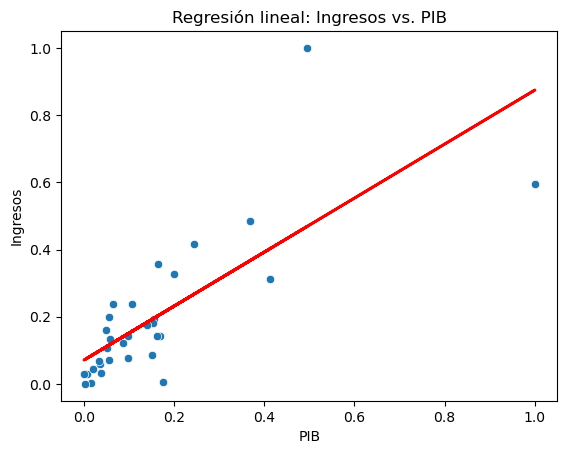

In [209]:
# Separar las características (PIB) y la variable objetivo (ingresos)
X = data['pip']
y = data['ingresos']

# Agregar una constante a X para estimar el intercepto del modelo
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión lineal
model = sm.OLS(y, X)
results = model.fit()

# Imprimir un resumen de los resultados del modelo
print(results.summary())

# Graficar los datos y el modelo de regresión lineal
sns.scatterplot(x='pip', y='ingresos', data=data)
plt.plot(X['pip'], results.predict(), color='red', linewidth=2)



# Mostrar la gráfica
plt.xlabel('PIB')
plt.ylabel('Ingresos')
plt.title('Regresión lineal: Ingresos vs. PIB')
plt.show()


In [210]:
import pandas as pd

data = df_ed

# Filtrar los datos para obtener solo la educación superior (columna 'Superior')
data_superior = data[['Entidad federativa', 'Superior']]

# Agrupar por entidad federativa y calcular la suma de la educación superior
suma_superior_por_entidad = data_superior.groupby('Entidad federativa')['Superior'].sum().reset_index()

suma_superior_por_entidad

,Entidad federativa,Superior
0,Aguascalientes,0.354288
1,Baja California,0.956723
2,Baja California Sur,0.110754
3,Campeche,0.176066
4,Chiapas,0.670046
5,Chihuahua,1.066313
6,Ciudad de México,5.184050
7,Coahuila de Zaragoza,0.889400
8,Colima,0.118394
9,Durango,0.367230


Coeficiente de determinación (R^2): -1.2938353532053828


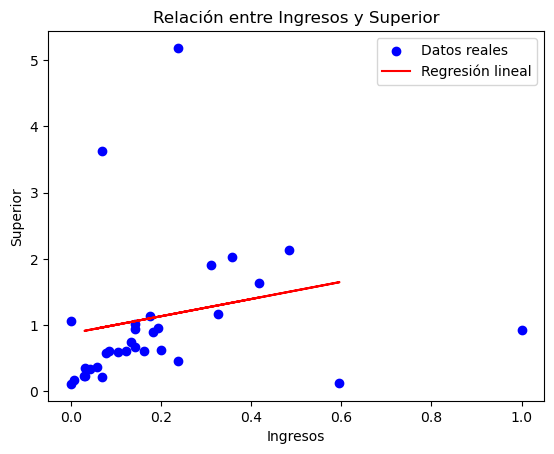

In [211]:
# Preparación de los datos
ingresos = df_merged['ingresos']
superior = suma_superior_por_entidad["Superior"]

# Crear un DataFrame combinando las dos columnas
data = pd.concat([ingresos, superior], axis=1)

# Eliminar filas con valores faltantes si es necesario
data.dropna(inplace=True)

# Separar los datos en características (X) y etiquetas (y)
X = data[['ingresos']]
y = data['Superior']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='b', label='Datos reales')
plt.plot(X_test, y_pred, color='r', label='Regresión lineal')
plt.xlabel('Ingresos')
plt.ylabel('Superior')
plt.title('Relación entre Ingresos y Superior')
plt.legend()
plt.show()


Coeficiente de determinación (R^2): -21.01877326577704


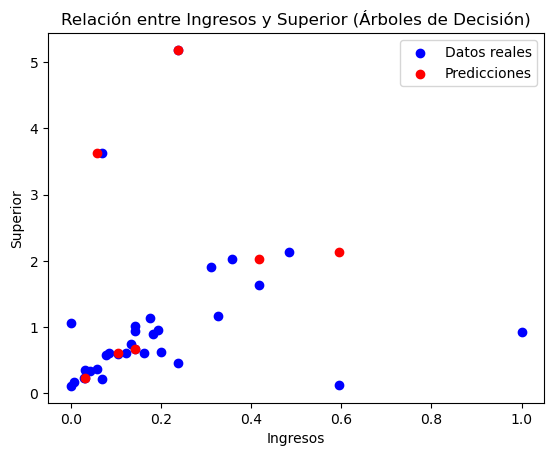

In [218]:
# Crear y entrenar el modelo de Árboles de Decisión
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)


# Graficar los datos y las predicciones del modelo
plt.scatter(X, y, color='b', label='Datos reales')
plt.scatter(X_test, y_pred, color='r', label='Predicciones')
plt.xlabel('Ingresos')
plt.ylabel('Superior')
plt.title('Relación entre Ingresos y Superior (Árboles de Decisión)')
plt.legend()
plt.show()
